In [1]:
import pandas as pd
import numpy as np
import pyspark
from pyspark import SparkContext, SparkConf
# from pyspark.mllib.fpm import FPGrowth
# from pyspark.sql import SparkSession
import sys
import re
import time

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
conf = SparkConf().setAppName("App")
conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '4G')
        .set('spark.driver.memory', '45G')
        .set('spark.driver.maxResultSize', '10G')).set("spark.network.timeout",'10000000')
sc = SparkContext(conf=conf)

# YFCC100M Numbers & Statistics

## Subsetting

In [11]:
# Number of data with Longtitude attribute
lines = sc.textFile('yfcc100m_dataset')
rdd = lines.filter(lambda x: x.split('\t')[12]!='').map(
                   lambda x: x.split('\t')[12:14])
rdd.count()

48469829

In [12]:
# Number of data with Longtitude attribute
lines = sc.textFile('yfcc100m_dataset')
rdd = lines.filter(lambda x: x.split('\t')[13]!='').map(
                   lambda x: x.split('\t')[12:14])
rdd.count()

48469829

In [60]:
# Number of data with Country tag
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find(':Country')!=-1) & (x.find(':Country')!=-1))
rdd.count()

47930381

In [62]:
# Number of data with Country, Suburb and Town tags
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find(':Country')!=-1) & (x.find(':Suburb')!=-1) & (x.find(':Town')!=-1))
rdd.count()

14433423

In [63]:
# Number of data with Country, Suburb and Town tags within United States
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find('United+States:Country')!=-1) & 
                   (x.find(':Suburb')!=-1) & (x.find(':Town')!=-1) & 
                   (x.find(':State')!=-1))
rdd.count()

7777276

In [67]:
# Number of data with Country, Suburb and Town tags within United States
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find('United+States:Country')!=-1) & 
                   (x.find(':Suburb')!=-1) & (x.find(':Town')!=-1) & 
                   (x.find(':State')!=-1))
rdd.take(28640)[-1]

'7007385675\t23545472:State+Department+Station:POI,55864666:Northwest+Washington:Suburb,2514815:Washington:Town,12587802:District+of+Columbia:County,2347567:District+of+Columbia:District,12765865:20037:Zip,23424977:United+States:Country,56043648:America%2FNew_York:Timezone'

In [74]:
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find('United+States:Country')!=-1) & 
                   (x.find(':Suburb')!=-1) & (x.find(':Town')!=-1) & 
                   (x.find(':State')!=-1) & (x.find(':State+')==-1)).map(
                   lambda x: re.search(',(.*):State', x).group(1).split(':')[-1])

states = pd.Series(rdd.collect())
# states

In [71]:
states

Series([], dtype: float64)

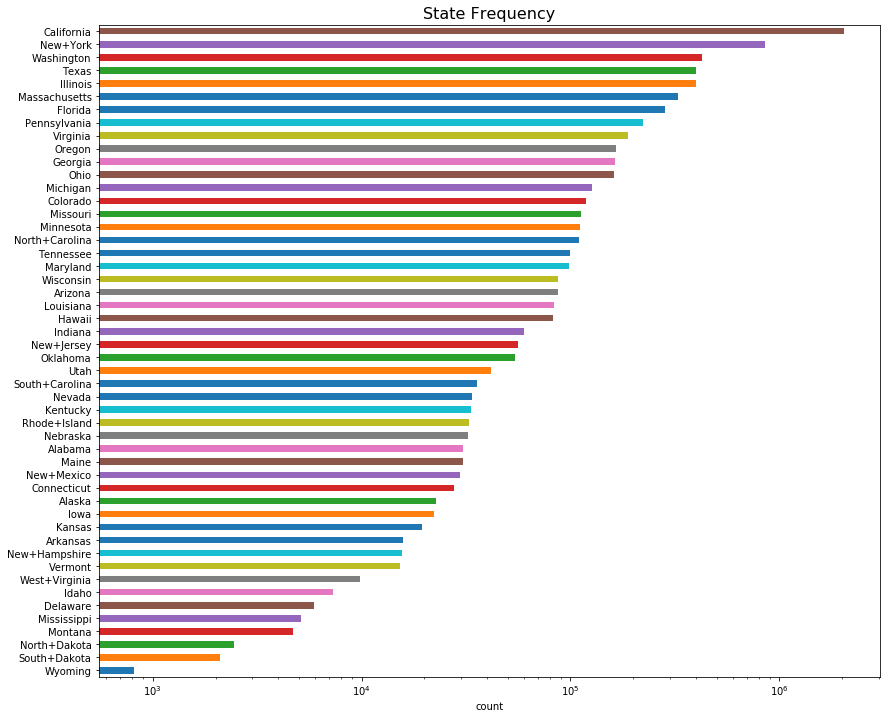

In [76]:
ax = plt.figure(figsize=(14,12))
counts = states.value_counts(ascending=True)
counts.plot.barh()
plt.title('State Frequency', fontsize = 16)
plt.xlabel('count')
plt.xscale('log')

In [77]:
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find('United+States:Country')!=-1) & 
                   (x.find(':Suburb')!=-1) & (x.find(':Town')!=-1) & 
                   (x.find('New+York:State')!=-1) & (x.find(':State+')==-1)).map(
                   lambda x: re.search(',(.*):Town', x).group(1).split(':')[-1])

towns = pd.Series(rdd.collect())

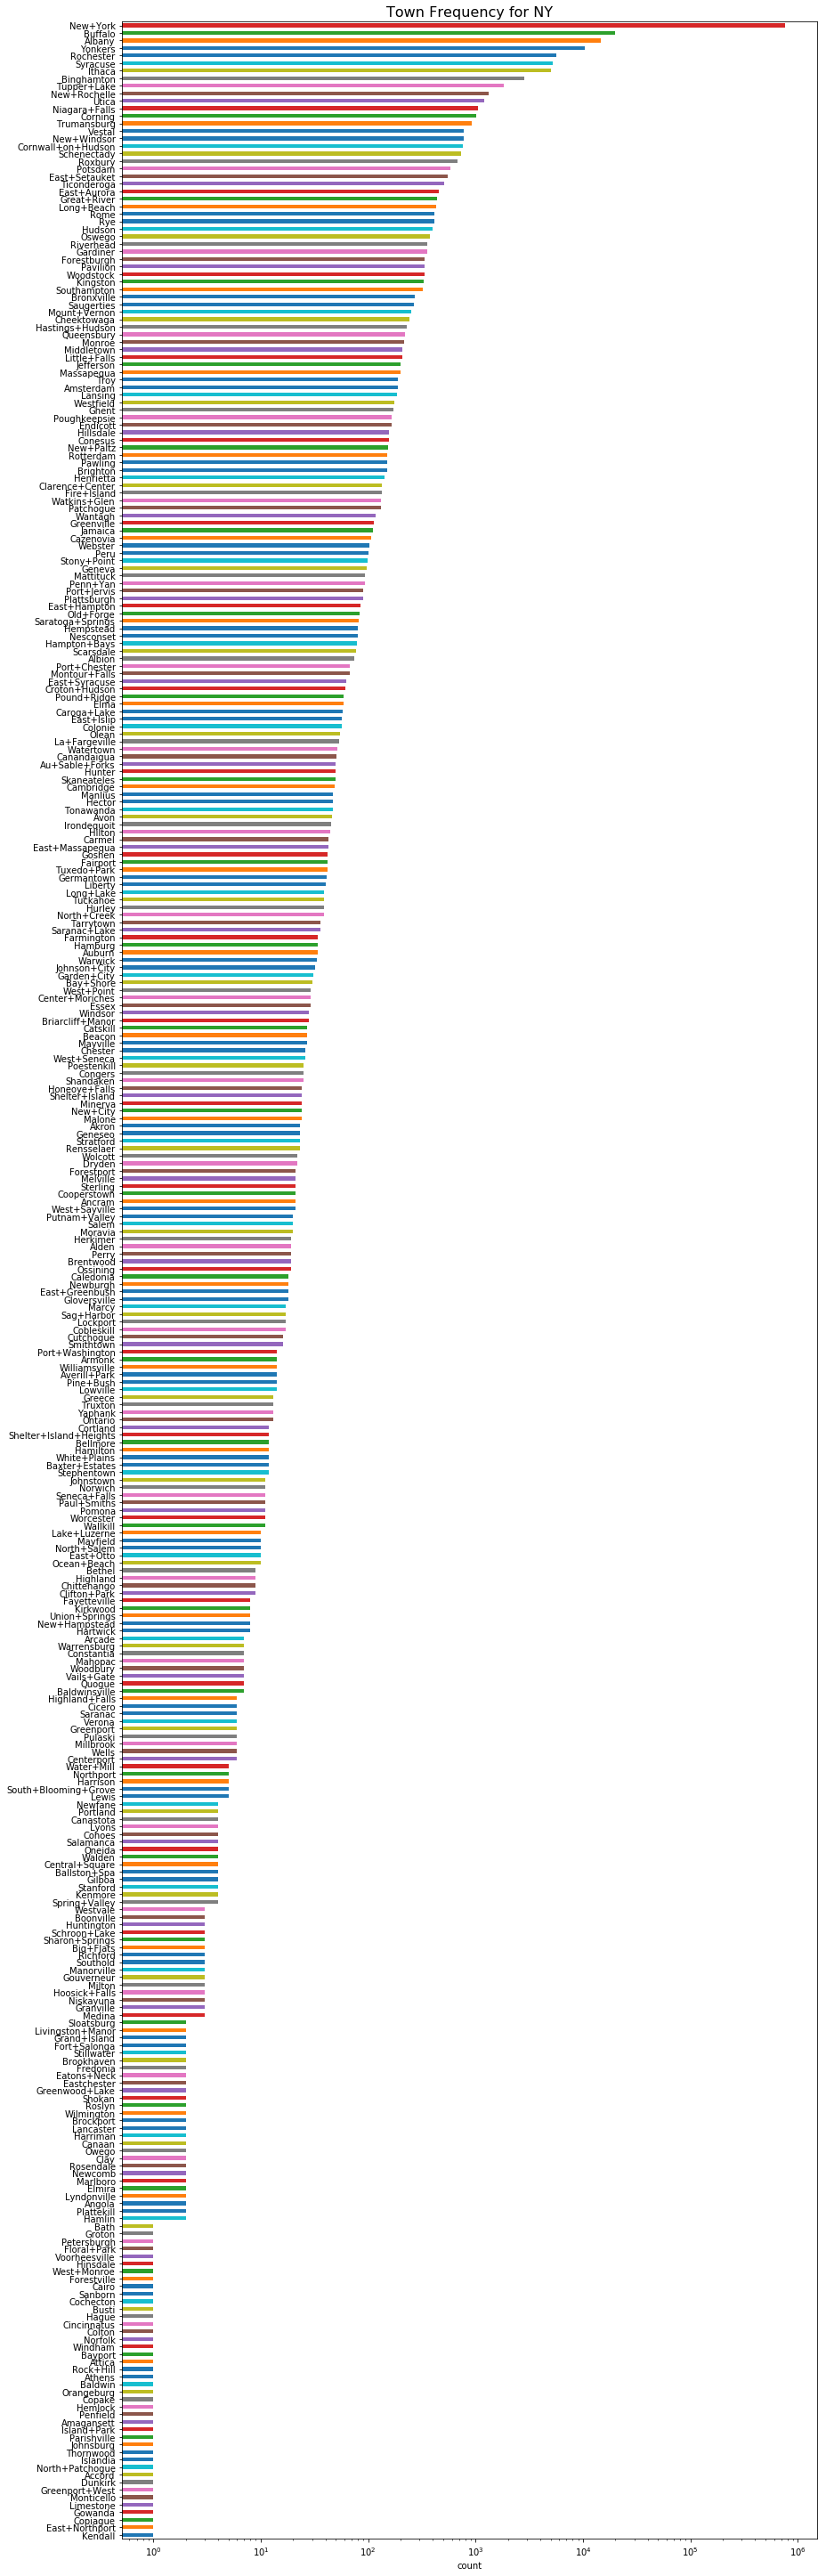

In [82]:
ax = plt.figure(figsize=(14,52))
counts = towns.value_counts(ascending=True)
counts.plot.barh()
plt.title('Town Frequency for NY', fontsize = 16)
plt.xlabel('count')
plt.xscale('log')

In [93]:
lines = sc.textFile('yfcc100m_places')
rdd = lines.filter(lambda x: (x.find('United+States:Country')!=-1) & 
                   (x.find(':Suburb')!=-1) & (x.find('New+York:Town')!=-1) & 
                   (x.find('New+York:State')!=-1) & (x.find(':State+')==-1)).map(
                   lambda x: re.search('(.*):Suburb', x).group(1).split(':')[-1])

suburb = pd.Series(rdd.collect())

In [90]:
suburb.unique()

array(['Midtown+Manhattan'], dtype=object)

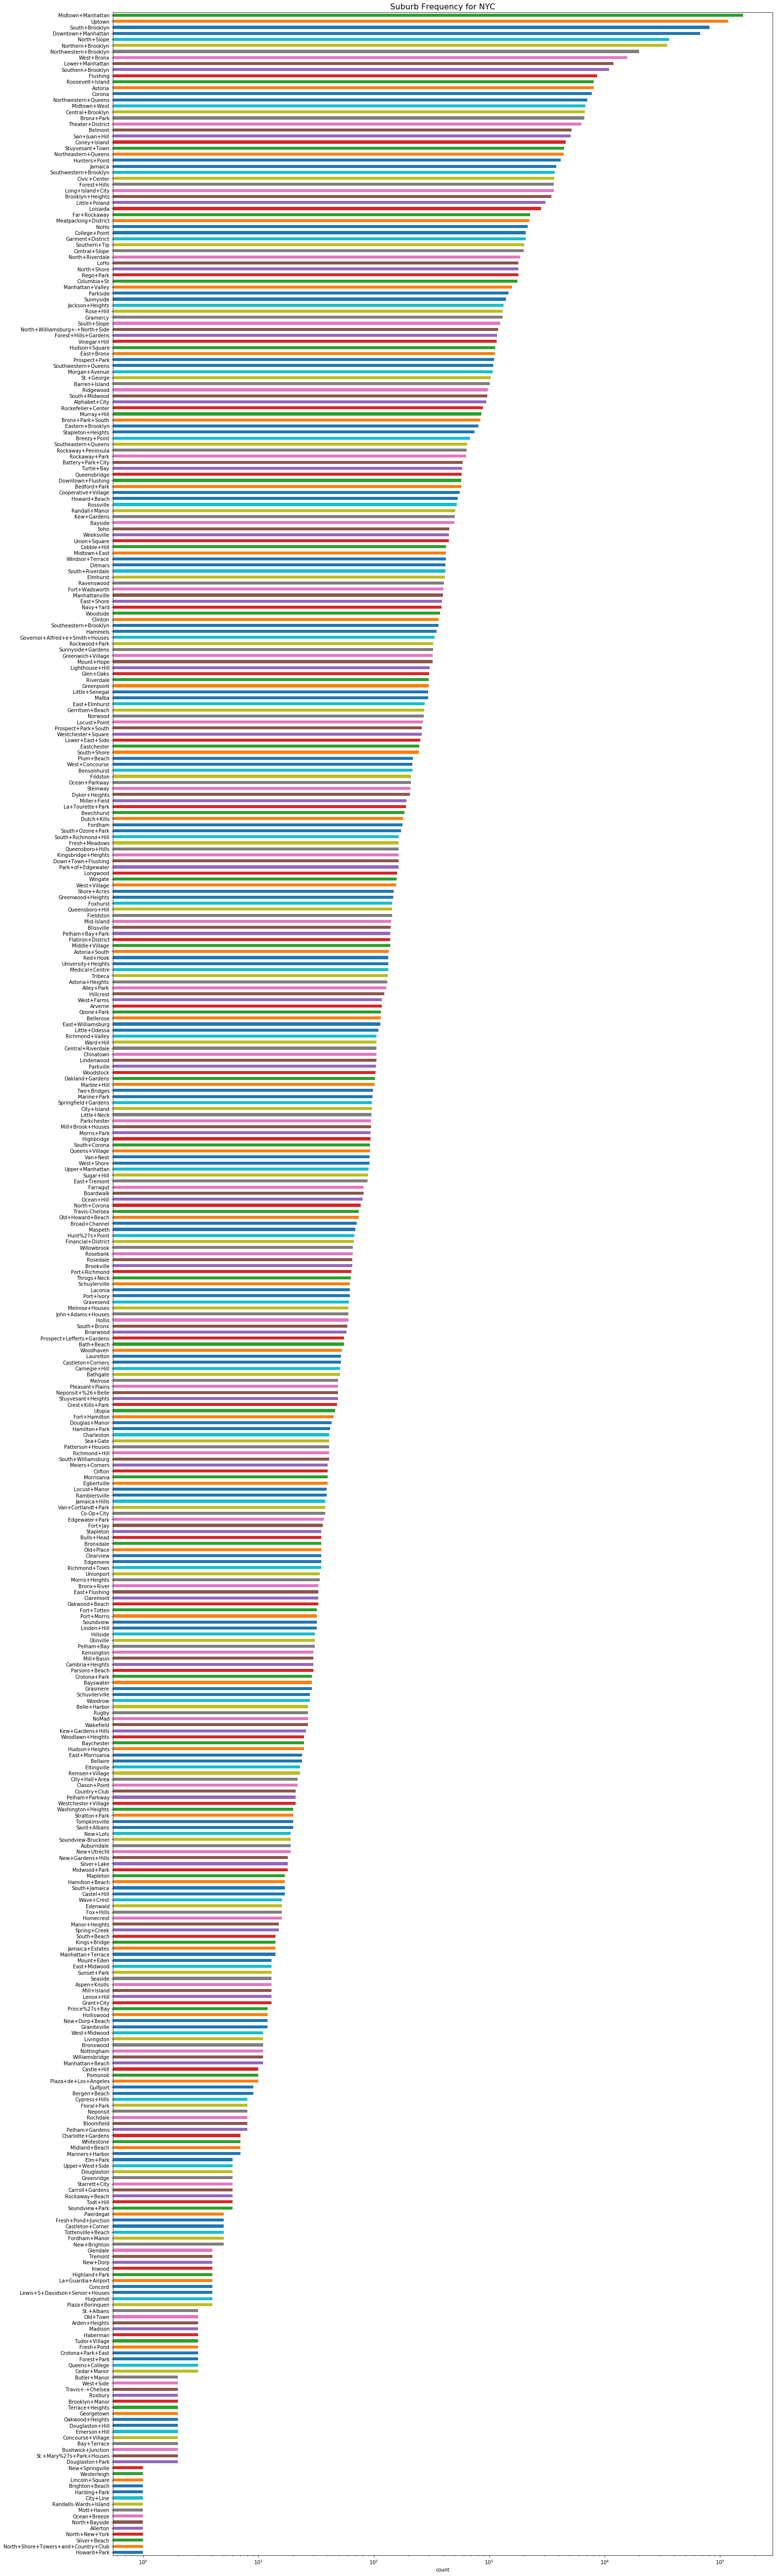

In [98]:
ax = plt.figure(figsize=(24,95))
counts = suburb.value_counts(ascending=True)
counts.plot.barh()
plt.title('Suburb Frequency for NYC', fontsize = 16)
plt.xlabel('count')
plt.xscale('log')

## Get geo-locations from yfcc100m_dataset

In [5]:
lines_places = sc.textFile('yfcc100m_places')
rdd_places = lines_places.filter(lambda x: (x.find('United+States:Country')!=-1) & 
                   (x.find(':Suburb')!=-1) & (x.find(':Town')!=-1) & 
                   (x.find(':State')!=-1) & (x.find(':State+')==-1)).map(
                                 lambda x: x.split('\t'))
subset_list_places = rdd_places.collect()

In [12]:
check_list = [c[0] for c in subset_list_places]
check_list[0]

'6985418911'

In [16]:
len(check_list)

7400019

In [ ]:
lines_dataset = sc.textFile('yfcc100m_dataset')
rdd_dataset = lines_dataset.filter(lambda x: (x.find('United+States:Country')!=-1) 


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [15]:
with open('filtered_data.csv','w') as w:
    with open('yfcc100m_dataset','r') as r:
        for each in r:
            #line = r.readline()
            line = each.split('\t')
            if line[12]!='' and line[1] in check_list:
                w.write(','.join(line))

KeyboardInterrupt: 

In [33]:
cols.values()

dict_values(['id', 'user_nid', 'user_nickname', 'date_taken', 'date_uploaded', 'capture_device', 'title', 'descr', 'user_tags', 'machine_tags', 'lon', 'lat', 'accuracy', 'photo_url', 'dl_url', 'license_name', 'license_url', 'server_id', 'farm_id', 'secret', 'secret_orig', 'ext', 'marker'])

In [70]:
df

NameError: name 'process' is not defined

In [ ]:
# pandas_df = pd.read_csv('yfcc100m_dataset', sep='\t', header=None)
df.columns = list(cols.values())

iter_csv = pd.read_csv('yfcc100m_dataset', sep='\t', header=None, names=list(cols.values()), 
                       iterator=True, chunksize=1000000)
df = pd.concat([chunk[chunk['lon'] != ''] for chunk in iter_csv.read()], ignore_index=True)

In [22]:
rdd_places = rdd_places.keyBy(lambda x : x[0])

In [23]:
lines_data_set = sc.textFile('yfcc100m_dataset').filter(
    lambda x: x.split('\t')[12]!='').map(
    lambda x: x.split('\t'))

In [24]:
lines_data_set = lines_data_set.repartition(8)

In [25]:
rdd_data_set = lines_data_set.keyBy(lambda x : x[1])

In [28]:
merged_rdd = rdd_places.union(rdd_data_set).reduceByKey(lambda x,y : x+y)

In [29]:
merged_rdd.take(1)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1391 in stage 3.0 failed 1 times, most recent failure: Lost task 1391.0 in stage 3.0 (TID 1394, localhost, executor driver): java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:51)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at sun.nio.ch.FileChannelImpl.transferToTrustedChannel(FileChannelImpl.java:516)
	at sun.nio.ch.FileChannelImpl.transferTo(FileChannelImpl.java:612)
	at org.apache.spark.util.Utils$.copyFileStreamNIO(Utils.scala:376)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply$mcJ$sp(Utils.scala:341)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:335)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:335)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1380)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:356)
	at org.apache.spark.util.Utils.copyStream(Utils.scala)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.writePartitionedFile(BypassMergeSortShuffleWriter.java:201)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:163)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:149)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:51)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at sun.nio.ch.FileChannelImpl.transferToTrustedChannel(FileChannelImpl.java:516)
	at sun.nio.ch.FileChannelImpl.transferTo(FileChannelImpl.java:612)
	at org.apache.spark.util.Utils$.copyFileStreamNIO(Utils.scala:376)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply$mcJ$sp(Utils.scala:341)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:335)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:335)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1380)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:356)
	at org.apache.spark.util.Utils.copyStream(Utils.scala)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.writePartitionedFile(BypassMergeSortShuffleWriter.java:201)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:163)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 51237)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/anaconda3/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/anaconda3/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/anaconda3/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/anaconda3/lib/python3.6/site-packages/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/anaconda3/lib/python3.6/site-packages/pyspark/serializers.py", line 685, in read_int
    raise EOFError
EOFError
----------------------------------------


In [27]:
rdd_places.take(1)

[('6985418911',
  ['6985418911',
   '56558566:Duval+Street:Suburb,2432044:Key+West:Town,12587846:Monroe:County,2347568:Florida:State,12772085:33040:Zip,23424977:United+States:Country,56043648:America%2FNew_York:Timezone'])]

In [23]:
rdd = lines.filter(lambda x: x.split('\t')[1]=='6985418911')
rdd.take(2)

KeyboardInterrupt: 

In [30]:
cols = {0:'id',1:'user_nid',2:'user_nickname',3:'date_taken',4:'date_uploaded',
          5:'capture_device',6:'title',7:'descr',8:'user_tags',9:'machine_tags',
          10:'lon',11:'lat',12:'accuracy',13:'photo_url',14:'dl_url',15:'license_name',
          16:'license_url',17:'server_id',18:'farm_id',19:'secret',20:'secret_orig',
          21:'ext',22:'marker'}

In [ ]:
pandas_df = pd.read_csv('yfcc100m_dataset', sep='\t', head=None)

In [106]:
lines = sc.textFile('yfcc100m_dataset')
rdd = lines.filter(lambda x: re.match('6985418911',x.split('\t')[1]))
rdd.collect()

['0\t6985418911\t4e2f7a26a1dfbf165a7e30bdabf7e72a\t39089491@N00\tnino63004\t2012-02-16 09:56:37.0\t1331840483\tCanon+PowerShot+ELPH+310+HS\tIMG_0520\t\tcanon,canon+powershot+hs+310,carnival+escatay,cruise,elph,hs+310,key+west+florida,powershot\t\t-81.804885\t24.550558\t12\thttp://www.flickr.com/photos/39089491@N00/6985418911/\thttp://farm8.staticflickr.com/7205/6985418911_df7747990d.jpg\tAttribution-NonCommercial-NoDerivs License\thttp://creativecommons.org/licenses/by-nc-nd/2.0/\t7205\t8\tdf7747990d\t692d7e0a7f\tjpg\t0']

In [ ]:
lines_data = sc.textFile('yfcc100m_dataset')
rdd_data = lines.filter(lambda x: x.split('\t')[1] in [subset_list_places[0]])
subset_list_data = rdd_data.collect()

In [ ]:
subset_list_data

In [109]:
len(subset_list_places)

7400019

In [105]:
lines = sc.textFile('yfcc100m_dataset')
rdd = lines.filter(lambda x: x)
rdd.take(1)

['0\t6985418911\t4e2f7a26a1dfbf165a7e30bdabf7e72a\t39089491@N00\tnino63004\t2012-02-16 09:56:37.0\t1331840483\tCanon+PowerShot+ELPH+310+HS\tIMG_0520\t\tcanon,canon+powershot+hs+310,carnival+escatay,cruise,elph,hs+310,key+west+florida,powershot\t\t-81.804885\t24.550558\t12\thttp://www.flickr.com/photos/39089491@N00/6985418911/\thttp://farm8.staticflickr.com/7205/6985418911_df7747990d.jpg\tAttribution-NonCommercial-NoDerivs License\thttp://creativecommons.org/licenses/by-nc-nd/2.0/\t7205\t8\tdf7747990d\t692d7e0a7f\tjpg\t0']